In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

In [2]:
df = pd.read_csv("./dataset/sex or gender_acoustic.csv")

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,sex or gender
0,0.171924,0.084798,0.191168,0.097835,0.251890,0.154055,2.158582,8.769025,0.955996,0.686715,...,0.171924,0.118349,0.043151,0.279114,1.370654,0.0,6.007764,6.007764,0.140773,male
1,0.119687,0.084263,0.100236,0.044716,0.184466,0.139750,0.832820,3.587928,0.972519,0.762762,...,0.119687,0.122129,0.043793,0.279114,0.730685,0.0,4.306641,4.306641,0.119247,male
2,0.151992,0.079224,0.147153,0.092833,0.228382,0.135548,2.086398,11.305400,0.966884,0.745067,...,0.151992,0.113303,0.043235,0.277358,1.324179,0.0,5.103369,5.103369,0.182165,male
3,0.165107,0.086021,0.176763,0.096534,0.249389,0.152855,2.787841,15.209603,0.964662,0.747109,...,0.165107,0.114948,0.043151,0.279114,1.379196,0.0,6.050830,6.050830,0.146071,male
4,0.177831,0.087909,0.206274,0.102537,0.257892,0.155355,3.057116,15.071552,0.944205,0.634907,...,0.177831,0.119130,0.043320,0.279114,1.276547,0.0,6.050830,6.050830,0.137097,male


In [4]:
# Divide the features and target
X, y = df[df.columns[:-1]], df['sex or gender']
# Reassign the target variables 
y = y.replace({'male':1,'female':0})

In [5]:
y.count()


825

In [6]:
y.value_counts()

1    495
0    330
Name: sex or gender, dtype: int64

In [7]:
# Observe the count, mean, std, min, max
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,0.179344,0.062578,0.185966,0.136839,0.227298,0.090460,2.678641,16.814585,0.929957,0.513838,0.191544,0.179344,0.134732,0.043366,0.277764,0.769451,0.028763,6.387557,6.358794,0.087488
std,0.030621,0.011409,0.040742,0.046930,0.027208,0.033605,1.597952,26.342090,0.026628,0.140739,0.069317,0.030621,0.023900,0.000847,0.002570,0.452963,0.068555,4.254015,4.270137,0.046535
min,0.058249,0.035707,0.025789,0.007368,0.085965,0.020607,0.656193,2.969910,0.823998,0.171188,0.003401,0.058249,0.095394,0.043109,0.259412,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.162359,0.054501,0.166660,0.107238,0.215277,0.059821,1.761383,6.613761,0.911991,0.402227,0.135548,0.162359,0.114697,0.043151,0.277358,0.519651,0.000000,3.122314,3.057715,0.054508
50%,0.183135,0.061679,0.193969,0.137249,0.232583,0.094434,2.280625,9.449113,0.932900,0.497844,0.209475,0.183135,0.130087,0.043235,0.279114,0.719109,0.000000,5.426367,5.383301,0.078562
75%,0.200834,0.069560,0.215677,0.175163,0.247388,0.113741,3.034795,15.765607,0.952705,0.628135,0.248989,0.200834,0.152834,0.043406,0.279114,0.989926,0.043066,8.484082,8.462549,0.112038
max,0.246078,0.090435,0.269196,0.246188,0.276199,0.186256,17.352595,430.137299,0.979504,0.828598,0.280000,0.246078,0.208464,0.064568,0.279114,7.879886,0.689063,21.985400,21.985400,0.719793


Testing the model (trained on kaggle dataset) with my data 

Training the model using RandomForest

In [8]:
X = StandardScaler().fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=1)

In [10]:
from sklearn.ensemble import RandomForestClassifier


In [11]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
# print("Score : {}".format(random_forest.score(X_test, y_test)))
y_predicted = random_forest.predict(X_test)
print(metrics.accuracy_score(y_test, y_predicted))
print ("Area under ROC curve: %.4f"%(metrics.roc_auc_score(y_test, y_predicted)))

0.812920592194
Area under ROC curve: 0.7916


Training the model through SVC pipeline

In [12]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [13]:
pipe_svc = Pipeline([('std_scl', StandardScaler()),
                    ('pca', PCA(n_components=10)),
                    ('svc', SVC(random_state=1))])
pipe_svc.fit(X_train, y_train)
print pipe_svc.score(X_test, y_test)

0.792732166891


Cross Validation

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
scores = cross_val_score(estimator=RandomForestClassifier(n_estimators = 500),
                       X=X_train, 
                       y=y_train,
                       cv=10, 
                       n_jobs=1)

In [16]:
print(scores)

[ 0.7    0.625  0.875  0.75   0.625  0.75   0.875  0.625  0.625  0.75 ]


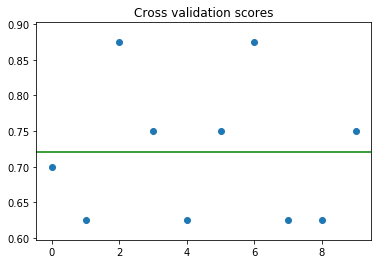

In [17]:
import matplotlib.pyplot as plt
plt.title('Cross validation scores')
plt.scatter(np.arange(len(scores)), scores)
plt.axhline(y=np.mean(scores), color='g') # Mean value of cross validation scores
plt.show()

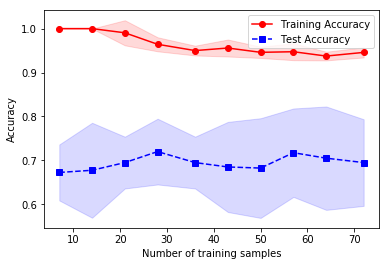

In [18]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_svc,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10)

# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)

# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

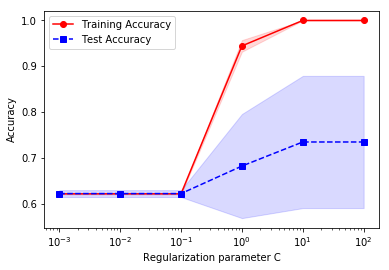

In [19]:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_svc,
                                             X=X_train,
                                             y=y_train,
                                             param_name='svc__C',
                                             param_range=param_range,
                                             cv=10)

# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)

# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(param_range, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(param_range,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(param_range, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(param_range,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xscale('log')
plt.xlabel('Regularization parameter C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

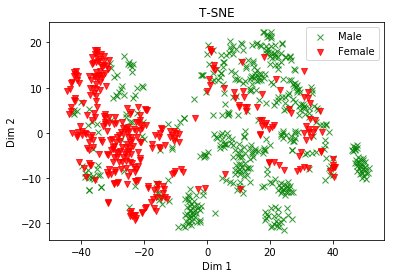

In [20]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='pca', random_state=0)
X_t = tsne.fit_transform(X)

plt.figure()
plt.scatter(X_t[np.where(y == 1), 0],
                   X_t[np.where(y == 1), 1],
                   marker='x', color='g',
                   linewidth='1', alpha=0.8, label='Male')
plt.scatter(X_t[np.where(y == 0), 0],
                   X_t[np.where(y == 0), 1],
                   marker='v', color='r',
                   linewidth='1', alpha=0.8, label='Female')

plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.title('T-SNE')
plt.legend(loc='best')
plt.savefig('youtube_audio_data.png')
plt.show()

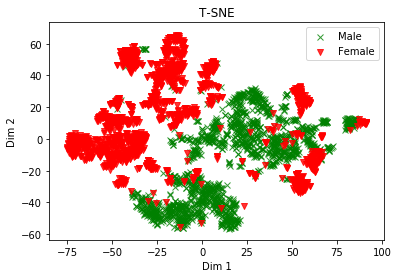

In [21]:
voice = pd.read_csv('voice.csv')
headers = voice.columns
X, y = voice[headers[:-1]], voice['label']
y = y.replace({'male':1,'female':0})

# Rescale data before TSNE

X_scale = StandardScaler().fit_transform(X)

# Sklearn TSNE

tsne = TSNE(n_components=2, init='pca', random_state=0)
X_t = tsne.fit_transform(X_scale)

plt.figure()
plt.scatter(X_t[np.where(y == 1), 0],
                   X_t[np.where(y == 1), 1],
                   marker='x', color='g',
                   linewidth='1', alpha=0.8, label='Male')
plt.scatter(X_t[np.where(y == 0), 0],
                   X_t[np.where(y == 0), 1],
                   marker='v', color='r',
                   linewidth='1', alpha=0.8, label='Female')

plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.title('T-SNE')
plt.legend(loc='best')
plt.savefig('kaggle_voice.png')
plt.show()


In figure youtube_audio_data.png and kaggle_voice.png, we observe that there is difference in the data distribution. A classifier trained for the kaggle dataset may not work well for the current dataset
